In [1]:
from BValg import *
from QEC import *
from noise import construct_bitphaseflip_noise_model
import matplotlib.pyplot as plt

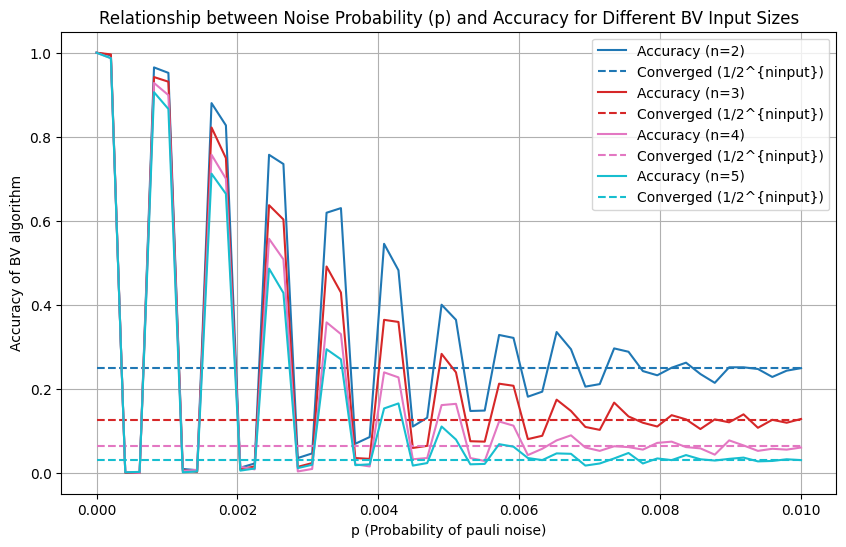

In [5]:
# Initialize parameters
n_values = range(2, 6)  # Input sizes (n) from 2 to 5
p_values = np.linspace(0, 0.01, 50)  # Noise probabilities
results = {}

# Simulate accuracy for different input sizes
for ninput in n_values:
    a = (1 << ninput) - 1  # Binary input
    b = 0
    alg = BVAlgorithm_qiskit(ninput+1)
    accuracies = []

    for p in p_values:
        noise_model = construct_bitphaseflip_noise_model(p)
        alg.set_input([a, b])
        alg.set_noise_model(noise_model)
        alg.construct_circuit()
        accuracy = alg.compute_result(1000)  # Using 800 shots
        accuracies.append(accuracy)
    
    results[ninput] = accuracies

# Plot the results
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(results)))  # Generate distinct colors for each pair

for idx, (ninput, accuracies) in enumerate(results.items()):
    color = colors[idx]
    # Use the same color for the solid and dashed lines for this pair
    plt.plot(p_values, accuracies, label=f"Accuracy (n={ninput})", color=color)
    plt.plot(p_values, 1 / (2 ** ninput) * np.ones_like(p_values), '--', label=r"Converged (1/2^{ninput})", color=color)


plt.xlabel("p (Probability of pauli noise)")
plt.ylabel("Accuracy of BV algorithm")
plt.title("Relationship between Noise Probability (p) and Accuracy for Different BV Input Sizes")
plt.legend()
plt.grid()
plt.show()

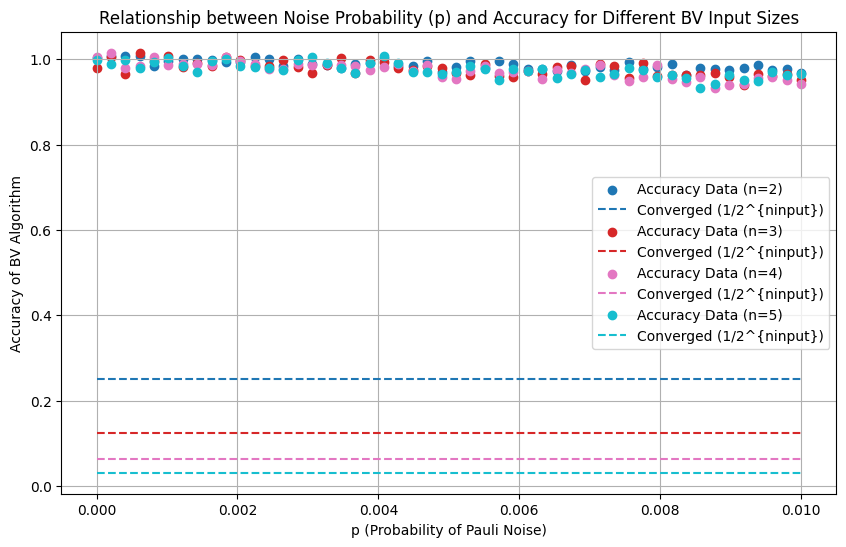

In [12]:
# Example data
from scipy.optimize import curve_fit

p_values = np.linspace(0, 0.01, 50)  # Noise probabilities
results = {
    2: np.exp(-3 * p_values) + np.random.normal(0, 0.01, len(p_values)),
    3: np.exp(-4 * p_values) + np.random.normal(0, 0.01, len(p_values)),
    4: np.exp(-5 * p_values) + np.random.normal(0, 0.01, len(p_values)),
    5: np.exp(-5 * p_values) + np.random.normal(0, 0.01, len(p_values))    
}

# Define an exponential decay function for fitting
def exp_decay(p, a, b):
    return a * np.exp(-b * p)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(results)))  # Generate distinct colors for each pair

for idx, (ninput, accuracies) in enumerate(results.items()):
    color = colors[idx]
    # Scatter plot for the real data
    plt.scatter(p_values, accuracies, label=f"Accuracy Data (n={ninput})", color=color)
    
    # Fit the curve and plot the fitted line
    popt, _ = curve_fit(exp_decay, p_values, accuracies, p0=(1, 1))
    fitted_accuracies = exp_decay(p_values, *popt)
    #plt.plot(p_values, fitted_accuracies, label=f"Fitted Curve (n={ninput})", linestyle='--', color=color)
    
    plt.plot(p_values, 1 / (2 ** ninput) * np.ones_like(p_values), '--', label=r"Converged (1/2^{ninput})", color=color)
plt.xlabel("p (Probability of Pauli Noise)")
plt.ylabel("Accuracy of BV Algorithm")
plt.title("Relationship between Noise Probability (p) and Accuracy for Different BV Input Sizes")
plt.legend()
plt.grid()
plt.show()

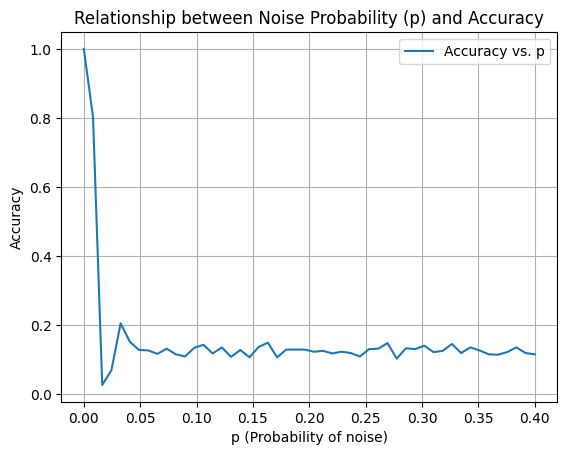

In [11]:
# Initialize values
ninput=3
a = (1<<ninput)-1
b = 0
alg=BVAlgorithm_qiskit(4)
# Prepare to store results
p_values = np.linspace(0, 0.4, 50)  # p values from 0 to 1 in steps of 0.01
accuracies = []

# Loop over different p values
for p in p_values:
    # Construct the noise model
    noise_model = construct_bitphaseflip_noise_model(p)
    
    # Set up the algorithm
    alg.set_input([a, b])
    alg.set_noise_model(noise_model)
    alg.construct_circuit()
    
    # Compute accuracy
    accuracy = alg.compute_result(800)
    accuracies.append(accuracy)

# Plot the results
plt.plot(p_values, accuracies, label="Accuracy vs. p")
plt.xlabel("p (Probability of noise)")
plt.ylabel("Accuracy")
plt.title("Relationship between Noise Probability (p) and Accuracy")
plt.legend()
plt.grid()
plt.show()

In [12]:
print(accuracy)

0.63


In [16]:
alg.a_to_string()

'01'

In [22]:
print(count)

{'10': 100}


In [5]:
circ=alg.circuit

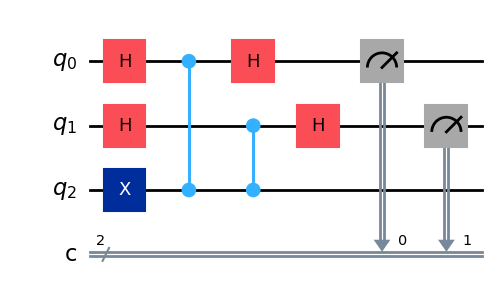

In [6]:
circ.draw("mpl")

In [7]:
from noise import *

#Initialize a repetiton 
rep=bitfliprepetitioncode(3)
#We can add a noise model to the QECcode class 
noisemodel=construct_bitflip_noise_model(0.01,0.01,0.01)
rep.construct_syndrome_table()
rep.show_syndrome_table()    
rep.add_noise_model(noisemodel)

The syndrome table is:
III->00
IIX->01
IXI->11
XII->10
The error table is:
00->III
01->IIX
11->IXI
10->XII


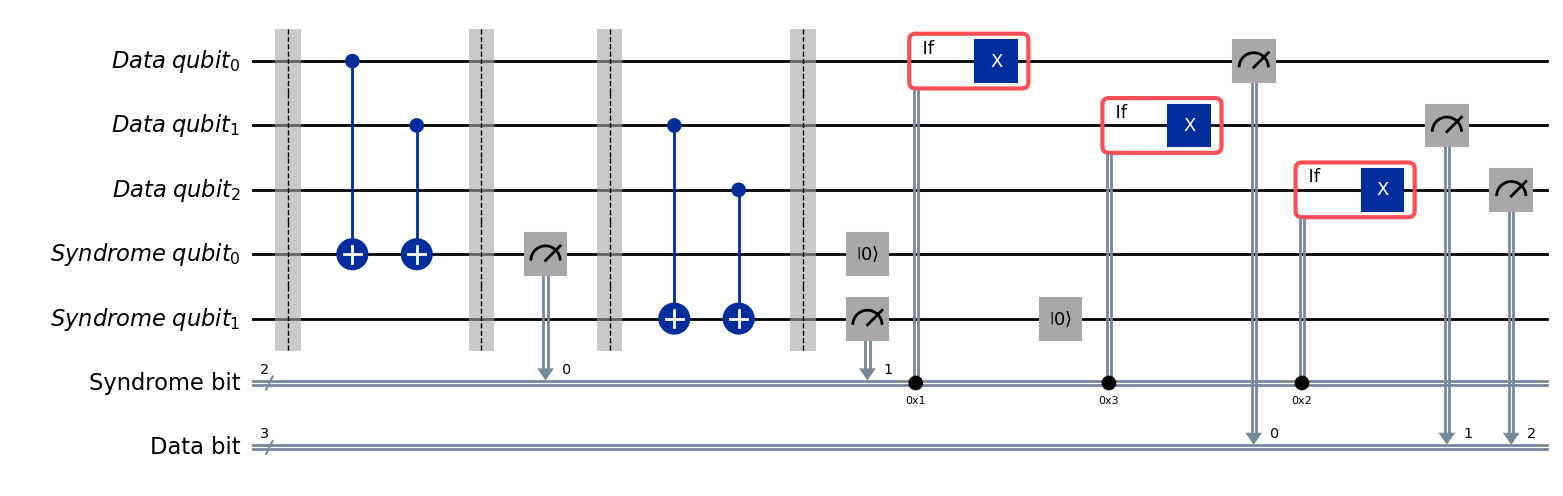

In [8]:
rep.construct_circuit()
rep._circuit.draw("mpl")

In [9]:
four=fourqubitcode()
four.construct_syndrome_table()
four.show_syndrome_table()  

Error: 01->IIXI is not unique
Error: 00->IIXX is not unique
Error: 10->IIZI is not unique
Error: 11->IIZX is not unique
Error: 00->IIZZ is not unique
Error: 01->IXII is not unique
Error: 00->IXIX is not unique
Error: 11->IXIZ is not unique
Error: 00->IXXI is not unique
Error: 11->IXZI is not unique
Error: 10->IZII is not unique
Error: 11->IZIX is not unique
Error: 00->IZIZ is not unique
Error: 11->IZXI is not unique
Error: 00->IZZI is not unique
Error: 01->XIII is not unique
Error: 00->XIIX is not unique
Error: 11->XIIZ is not unique
Error: 00->XIXI is not unique
Error: 11->XIZI is not unique
Error: 00->XXII is not unique
Error: 11->XZII is not unique
Error: 10->ZIII is not unique
Error: 11->ZIIX is not unique
Error: 00->ZIIZ is not unique
Error: 11->ZIXI is not unique
Error: 00->ZIZI is not unique
Error: 11->ZXII is not unique
Error: 00->ZZII is not unique
The syndrome table is:
IIII->00
IIIX->01
IIIZ->10
IIXI->01
IIXX->00
IIXZ->11
IIZI->10
IIZX->11
IIZZ->00
IXII->01
IXIX->00
IXIZ->11

In [10]:
four.construct_circuit()

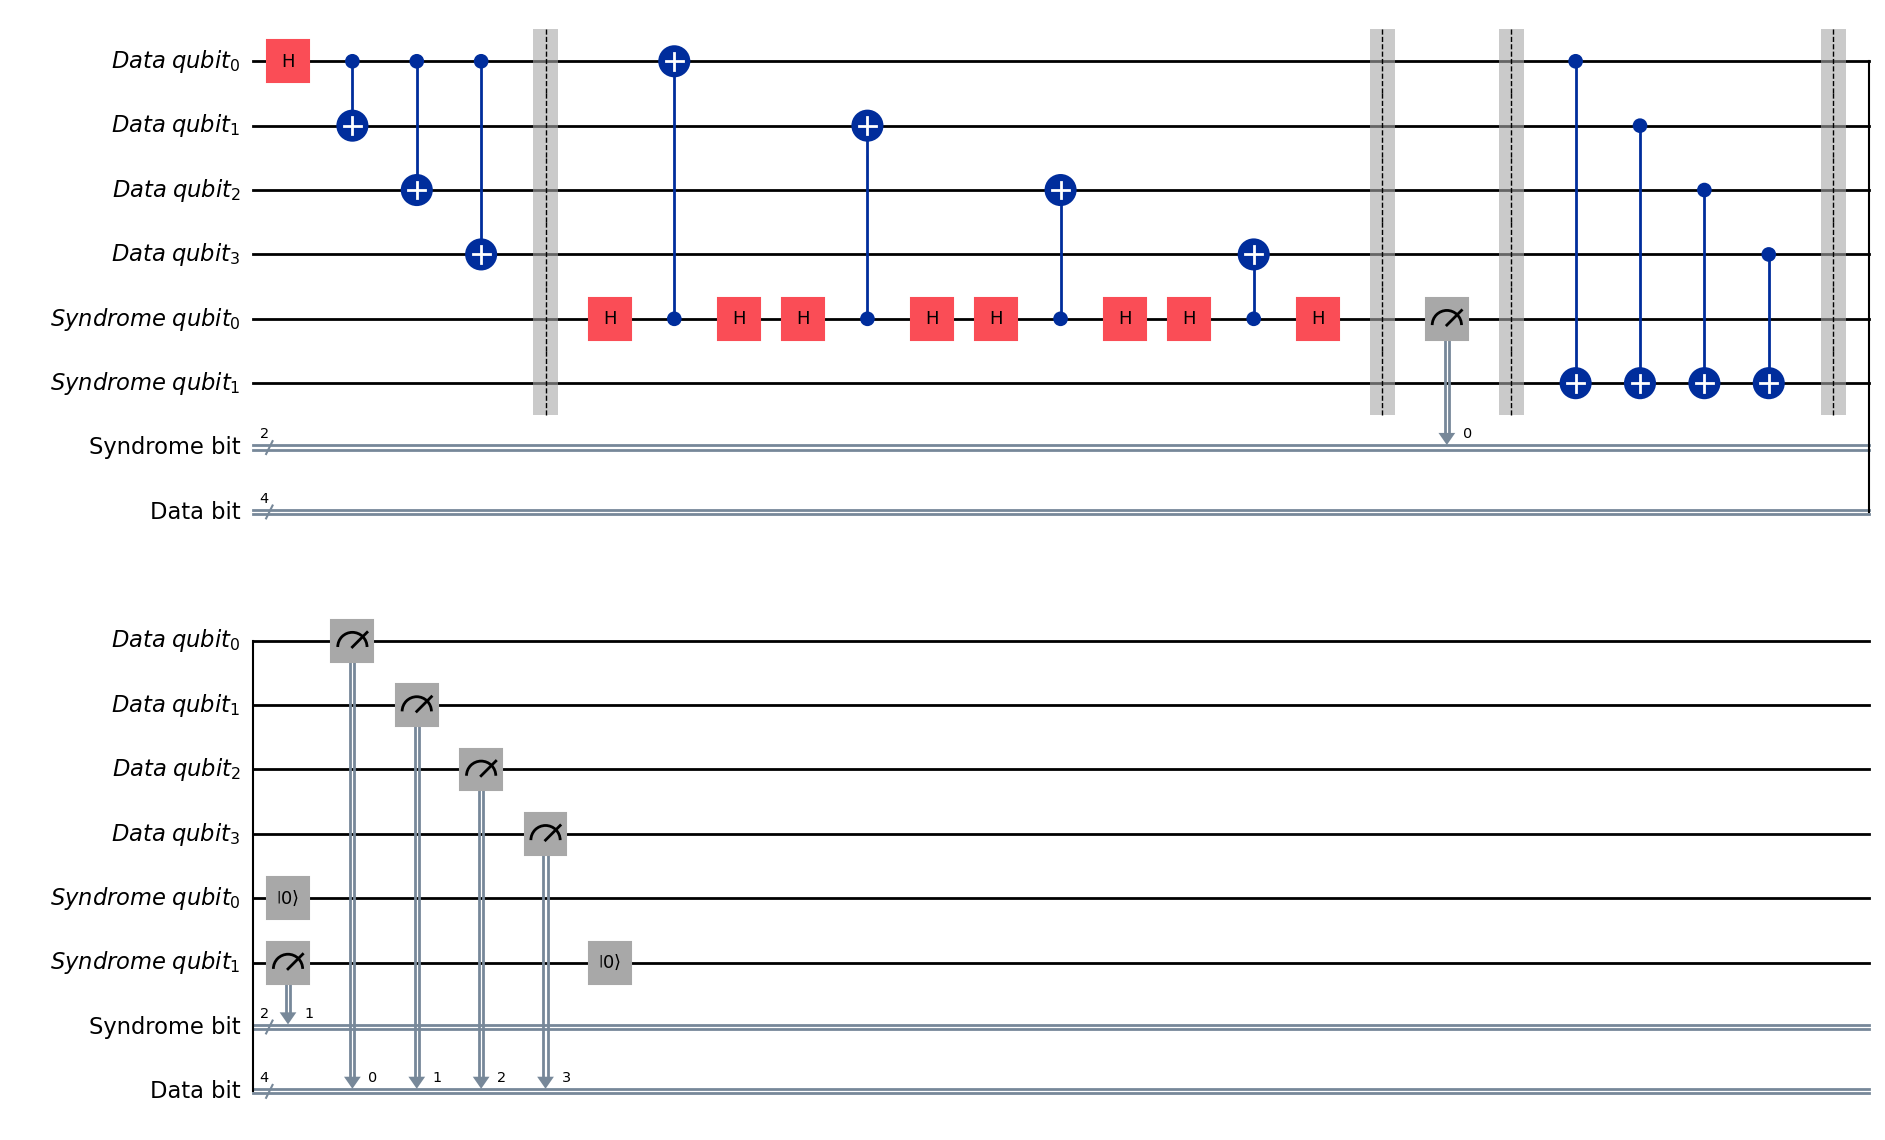

In [11]:
four._circuit.draw("mpl")

In [8]:
tmp=QuantumCircuit(8)

In [9]:
tmp.cx(0,1)
tmp.cx(2,3)
tmp.cx(4,5)
tmp.cx(6,7)
tmp.cx(0,7)

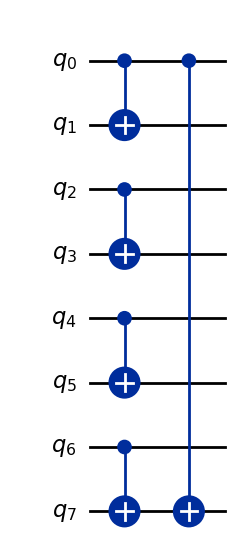

In [10]:
tmp.draw("mpl")